# **Алгоритм Краскала **

Это алгоритм поиска минимального остовного дерева в неориентированном взвешенном графе. 

Он используется в задачах оптимизации и построении сетей связи, например, при проектировании транспортных маршрутов или оптимизации подсетей в компьютерных сетях.

# **Постановка задачи**

Имеется следующий неориентированный взвешенный граф. Назовем остовным деревом подграф, содержащий все вершины исходного графа, который является деревом. И задача состоит в том, чтобы найти такое остовное дерево, сумма рёбер которого минимальна.

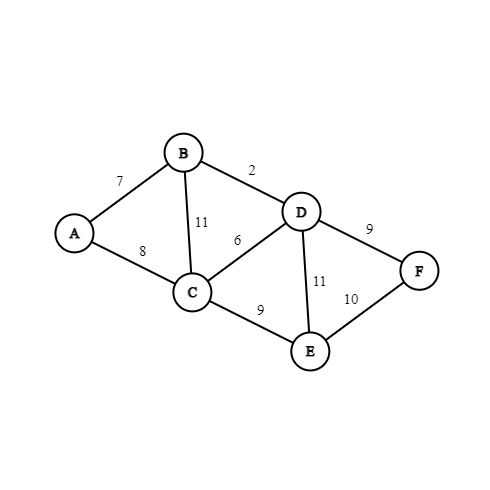

Исходный граф

Алгоритм: На входе имеется пустой подграф, который мы будем достраивать до потенциального минимального остовного дерева.

Т.е:



1.   Вначале мы производим сортировку рёбер по неубыванию по их весам.

2.   Добавляем i-ое ребро в наш подграф только в том случае, если данное ребро соединяет две разные компоненты связности, одним из которых является наш подграф. То есть, на каждом шаге добавляется минимальное по весу ребро, один конец которого содержится в нашем подграфе, а другой - еще нет.

Алгоритм завершит свою работу после того, как множество вершин нашего подграфа совпадет с множеством вершин исходного графа.





Разбор примера по шагам

Выпишем все ребра исходного графа

1)A -- B weight = 7

2)A -- C weight = 8

3)B -- C weight = 11

4)B -- D weight = 2

5)D -- C weight = 6

6)D -- E weight = 11

7)C -- E weight = 9

8)D -- F weight = 9

9)E -- F weight = 10

Будем идти по списку ребер и добавлять в наш остов ребра с минимальным весом 

1)

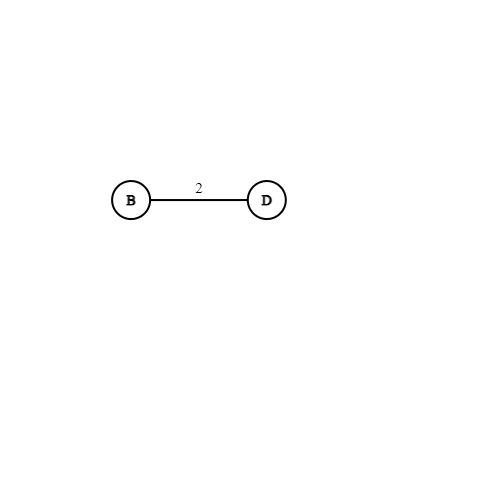

Подграф после добавления первого ребра 

2)

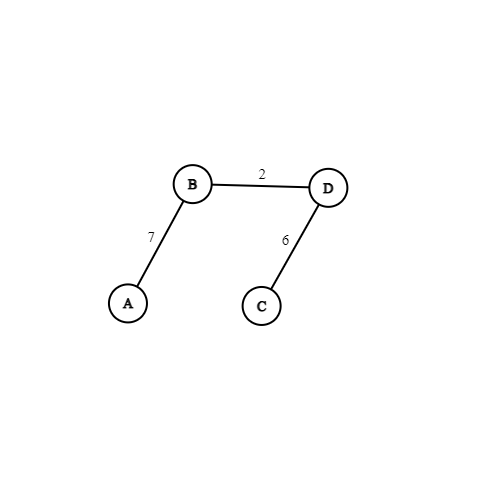

При добавлении в остов ребра A -- C образуется замкнутый контур(цикл) поэтому пропускаем это ребро.

3)

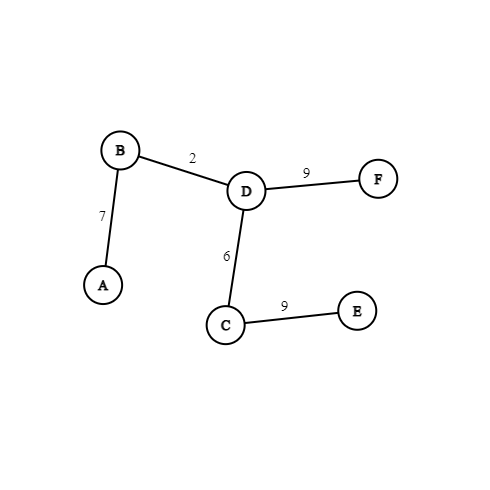

В итоге образовывается следующий подграф в котором мы соединили все вершины ребрами с минимально возможными весами, следовательно, нашли минимальное остовное дерево для нашего исходного графа.




In [7]:
# Определяем класс ребра
class Edge:
    def __init__(self, u, v, weight):
        self.u = u
        self.v = v
        self.weight = weight

# Определяем функцию, которая находит корень/предка графа 
def find(parent, i):
    if parent[i] != i:
        parent[i] = find(parent, parent[i])
        print(parent)
    return parent[i]
  

def union(parent, rank, x, y):                          # Определяем функцию, которая объединяет два подграфа
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:                                               # выполняется лишь один раз при инициализации 
        parent[yroot] = xroot
        rank[xroot] += 1


def KruskalMST(graph, V):                               # Определяем функцию, которая реализует алгоритм Краскала

    result = []                                         # список ребер остовного дерева
    
                                                  

    
    graph = sorted(graph, key=lambda item: item.weight) # Сортируем список ребер по возрастанию веса

    parent = []                                         # список для хранения корней поддеревьев
    rank = []                                           # список для хранения высоты каждого поддерева

                                                        # Инициализируем список и высоту каждого поддерева
    for node in range(V):
        parent.append(node)
        rank.append(0)
    e = 0                                               # индекс для списка ребер остовного дерева
    i = 0                                               # индекс для перебора ребер
    while e < V - 1:
                                                        
        u = graph[i].u                                  # Берем ребро с наименьшим весом
        v = graph[i].v
        w = graph[i].weight
        
        x = find(parent, u)
        y = find(parent, v)

        
        if x != y:                                      # Если добавление ребра не приведет к циклу
            e += 1
            result.append(graph[i])
            union(parent, rank, x, y)
        i += 1
    # Выводим список ребер остовного дерева
    print("Edges of Minimum Spanning Tree:")
    for item in result:
        print(item.u, "-", item.v, ":", item.weight)

# Тестируем алгоритм
V = 4 # Количество вершин
graph = [] # Список ребер

# Добавляем ребра
graph.append(Edge(0, 1, 10))
graph.append(Edge(0, 2, 6))
graph.append(Edge(0, 3, 5))
graph.append(Edge(1, 3, 15))
graph.append(Edge(2, 3, 4))

KruskalMST(graph, V)


[0, 1, 2, 2]
[2, 1, 2, 2]
[2, 1, 2, 2]
Edges of Minimum Spanning Tree:
2 - 3 : 4
0 - 3 : 5
0 - 1 : 10
